# 3.c Model Development Sliding window (Close)

In [74]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import boto3 
import io  
from sagemaker import get_execution_role
role = get_execution_role()
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [75]:
session = boto3.Session()

In [76]:
role

'arn:aws:iam::190183093544:role/service-role/AmazonSageMaker-ExecutionRole-20220602T141236'

In [77]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_train_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_train = np.load(io.BytesIO(obj['Body'].read()))  

In [78]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_train_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_train = np.load(io.BytesIO(obj['Body'].read())) 

In [79]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_test_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_test = np.load(io.BytesIO(obj['Body'].read())) 

In [80]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_test_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_test = np.load(io.BytesIO(obj['Body'].read())) 

In [81]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_val_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_val = np.load(io.BytesIO(obj['Body'].read())) 

In [82]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_val_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_val = np.load(io.BytesIO(obj['Body'].read())) 

In [83]:
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [84]:
scaler = MinMaxScaler()
# transform data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
X_val = scaler.fit_transform(X_val)
y_val = scaler.fit_transform(y_val)

### Building the linear regression model

In [85]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Defining functions to compute metrics

In [86]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [87]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, X_train, y_train)
lin_reg_model_perf_train

Training Performance:


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.022098  0.00876   0.996462        0.996407  0.516783

In [88]:
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, X_test, y_test)
lin_reg_model_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.046403  0.020376   0.985618        0.985082  1.15106

In [89]:
X_train.shape

(1949, 30)

In [90]:
y_train.shape

(1949, 1)

In [91]:
preds = lin_reg_model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.022285865656193553

### Performace Visualization on Test Set

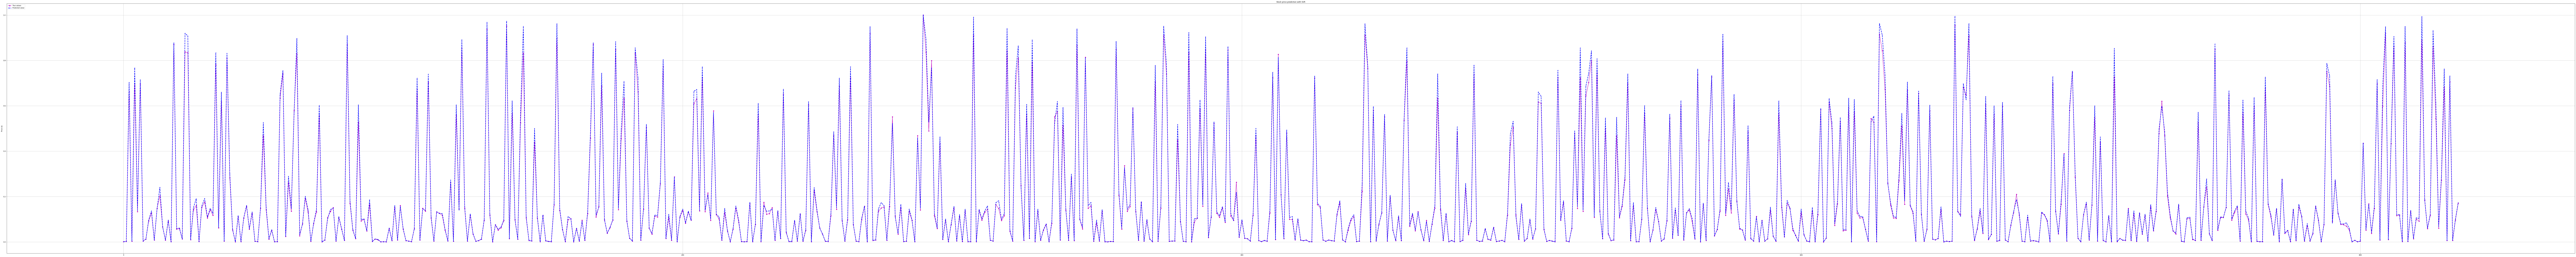

In [92]:
##Perform visualization.
ln_x_test = range(len(X_test))
y_predict = lin_reg_model.predict(X_test)
#Set the canvas.
plt.figure(figsize=(300,30))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value')
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()

### Using grid search to identify a better model

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR               

In [94]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [95]:
print("Training Performance:")
svr_model_perf_train = model_performance_regression(model, X_train, y_train)
svr_model_perf_train

Training Performance:


RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.065712  0.061493   0.968714        0.968224  25.231227

In [96]:
print("Testing Performance:")
svr_model_perf_train = model_performance_regression(model, X_test, y_test)
svr_model_perf_train

Testing Performance:


RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.067637  0.063399   0.969443        0.968305  27.299186

### Performace Visualization on Test Set

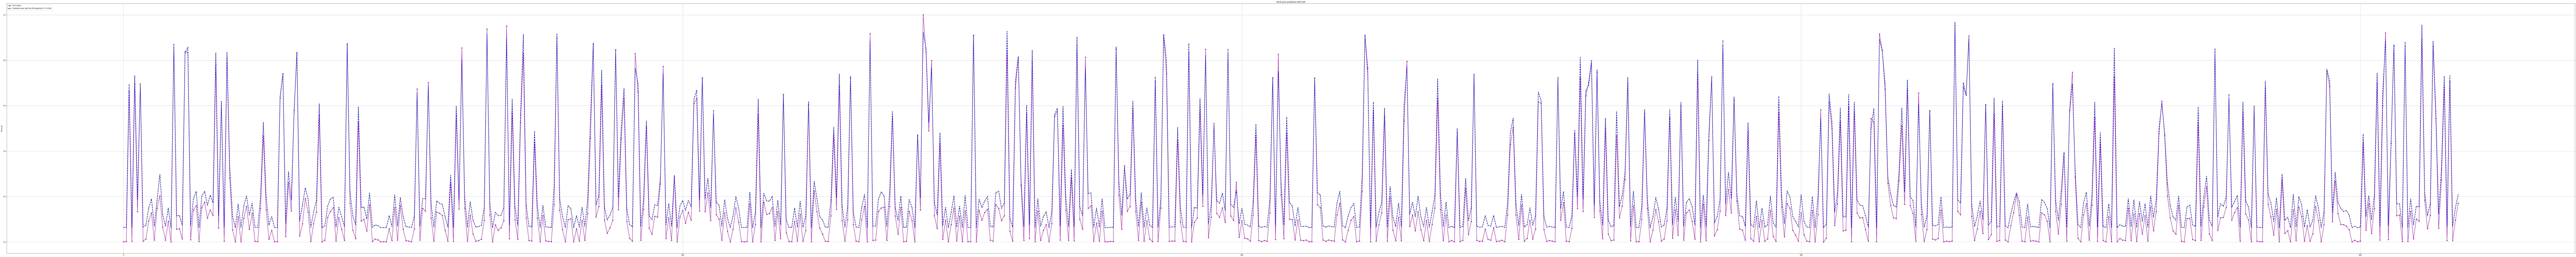

In [97]:
##Perform visualization.
ln_x_test = range(len(X_test))
y_predict = model.predict(X_test)
#Set the canvas.
plt.figure(figsize=(300,30))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value with the SVR algorithm, $R^2$=%.3f' % (model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()

In [98]:
#making a variable to perform predictions and replace original values
X_val_predict=X_val

### Function to predict and replace values in the 30 day validation set

In [99]:
def prediction_replace(value):
    """function to predict and replace validation set"""
    j=0
    i=0
    f=0
    preds=[]
    #for f in range(len(value)-1):
    for i in range(len(value)-1):
        pred_val=lin_reg_model.predict(value[f:f+1])
        preds.append(pred_val)
        value[i+1][29-j]=preds[i]
        #value[i][len(value[i,])-1-j]=pred_val
        j+=1
        f+=1
        y_val_predict=preds
    return y_val_predict
 
    
            
"""        
def prediction(value):
    pred_values=[]
    for i in range(len(value)):
        pred_val=lin_reg_model.predict(value[i:i+1])
        pred_values.append(pred_val)
      
    return pred_values
    """

'        \ndef prediction(value):\n    pred_values=[]\n    for i in range(len(value)):\n        pred_val=lin_reg_model.predict(value[i:i+1])\n        pred_values.append(pred_val)\n      \n    return pred_values\n    '

### Variable stores Our predicted values 

In [100]:
y_val_predict=prediction_replace(X_val_predict)

In [101]:
#transforming variable to a single array
y_val_predict=np.concatenate(y_val_predict)

### Checking performance

In [102]:
print("Validation Performance:")
linear_regression_perf_val = model_performance_regression(lin_reg_model, X_val_predict, y_val)
linear_regression_perf_val

Validation Performance:


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.203227  0.146556   0.891309        4.152035  8.61596

### Inverse transforming values to original values

In [103]:
true_y_predict=scaler.inverse_transform(y_val_predict)

In [104]:
true_y_predict=pd.DataFrame(true_y_predict,columns=['price'])

In [105]:
true_y_predict

price
0   28906.263385
1   30561.844095
2   30361.314120
3   29062.091993
4   29864.176401
5   30328.006660
6   32993.388405
7   29444.725311
8   30522.609856
9   29166.178179
10  28351.212958
11  26534.038369
12  22584.118990
13  21808.589102
14  22316.021531
15  19993.773709
16  20399.483022
17  19708.280420
18  21254.529262
19  20196.212836
20  19030.509515
21  20654.713750
22  21960.156511
23  21613.664547
24  22610.669733
25  21558.231356
26  20675.437978
27  20512.530664
28  20213.752153

In [106]:
true_y=scaler.inverse_transform(y_val)

In [107]:
true_y=pd.DataFrame(true_y,columns=['price'])

In [108]:
true_y

price
0   30467.488281
1   29704.390625
2   29832.914063
3   29906.662109
4   31370.671875
5   31155.478516
6   30214.355469
7   30111.998047
8   29083.804688
9   28360.810547
10  26762.648438
11  22487.388672
12  22206.792969
13  22572.839844
14  20381.650391
15  20471.482422
16  19017.642578
17  20553.271484
18  20599.537109
19  20710.597656
20  19987.029297
21  21085.876953
22  21231.656250
23  21502.337891
24  21027.294922
25  20735.478516
26  20280.634766
27  20104.023438
28  19784.726563
29  19269.367188

### Visualizing perfromance on validation set

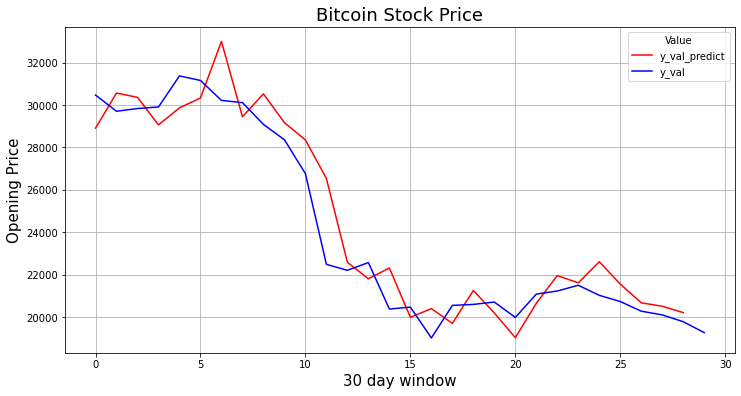

In [109]:
plt.figure(figsize=(12,6))
plt.plot(true_y_predict['price'], label = 'y_val_predict',color='red')
plt.plot(true_y['price'],label = "y_val", color = 'blue')
plt.legend(title='Value')
plt.ylabel("Opening Price", fontsize=15)
plt.xlabel("30 day window", fontsize=15)
plt.title("Bitcoin Stock Price", fontsize=18)
#display plot
plt.grid(True)
plt.show()

### Checking difference in prediction

In [110]:
#value of of difference in prediction
drift=true_y-true_y_predict

In [111]:
#percentage of difference in prediction
drift_precentage=((true_y-true_y_predict)/true_y)*100

In [112]:
drift_precentage

price
0    5.124232
1   -2.886622
2   -1.771198
3    2.824020
4    4.802242
5    2.655943
6   -9.197724
7    2.215970
8   -4.947101
9   -2.839720
10  -5.935752
11 -17.995196
12  -1.699147
13   3.385709
14  -9.490748
15   2.333533
16  -7.266097
17   4.111224
18  -3.179645
19   2.483679
20   4.785703
21   2.044796
22  -3.431198
23  -0.517742
24  -7.530093
25  -3.967851
26  -1.946700
27  -2.031968
28  -2.168469
29        NaN

### Visulaizing the difference

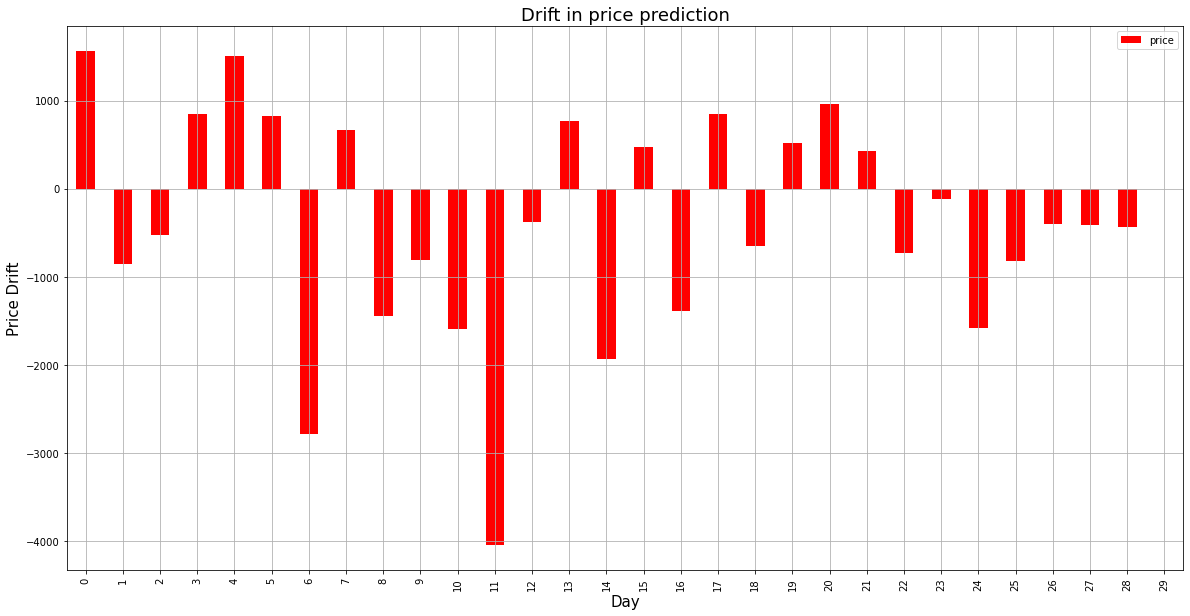

In [113]:
#difference in value
drift.plot(kind="bar",color='red',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)

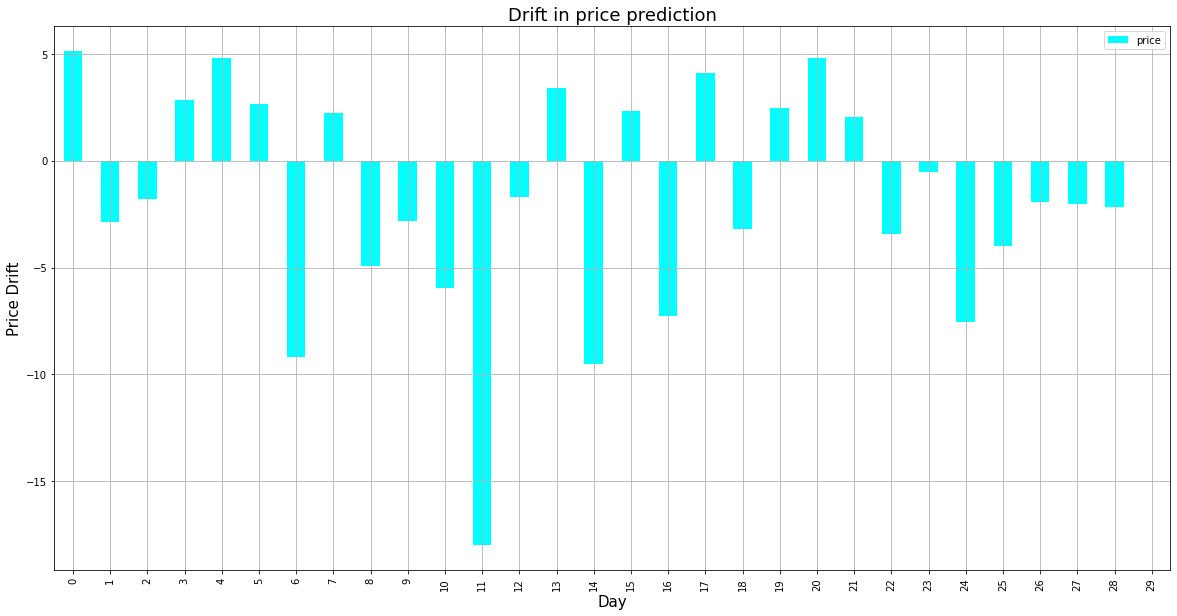

In [114]:
#difference in percentage
drift_precentage.plot(kind="bar",color='cyan',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)